In [5]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import wandb

from wandb_utils import first_logged_artifact_of_type, load_lm_from_artifact

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from wandb_utils import first_used_artifact_of_type, load_dm_from_artifact

api = wandb.Api()

run_c = api.run('romeu/NeRF2D/qyxltox2')
run_d = api.run('romeu/NeRF2D/5x9fjp84')

In [50]:
run = run_c

model_artifact = first_logged_artifact_of_type(run, 'model')
nerf = load_lm_from_artifact(model_artifact).cpu()

dataset_artifact = first_used_artifact_of_type(run, 'dataset')
dm = load_dm_from_artifact(dataset_artifact, model_artifact)

wandb:   1 of 1 files downloaded.  
wandb:   406 of 406 files downloaded.  
wandb:   1 of 1 files downloaded.  


<class 'torch.Tensor'>


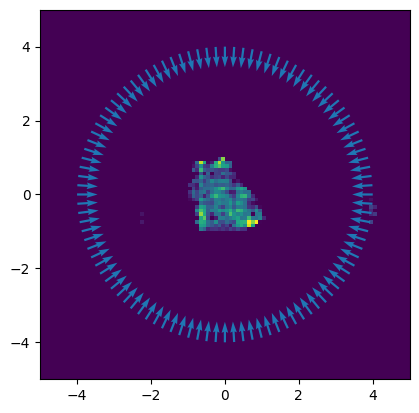

In [52]:
from visualizations.figures import poses_to_quiver

xs, ys, dx, dy = poses_to_quiver(dm.val_poses)

# pass
plt.quiver(xs, ys, dx, dy, color='tab:blue')

densities = nerf.render_density_field(res=100, lo=-5, hi=5)
plt.imshow(densities, extent=(-5, 5, -5, 5), cmap='viridis')
print(type(dm.val_poses))